In [189]:
from time import time # 用于计算运行时间
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import offsetbox # 定义图形box的格式
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection) 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score


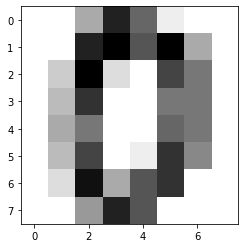

In [190]:
digits = datasets.load_digits(n_class=10)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
# Split data into train and test subsets
# 使用train_test_split将数据集分为训练集，测试集, y_train 表示训练集中样本的类别标签, y_test表示测试集中样本的类别标签
# test_size = 0.5 表示使用一半数据进行测试, 另一半就用于训练



In [191]:
data = datasets.load_digits(n_class=10)
print(data.data[0])
train_data, test_data, train_label, test_label = train_test_split(
    data.data, data.target, test_size=0.01, shuffle=False)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [192]:
print(train_data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0. 12. ...  4.  0.  0.]
 [ 0.  0.  0. ...  3.  0.  0.]
 [ 0.  0.  0. ...  7.  0.  0.]]


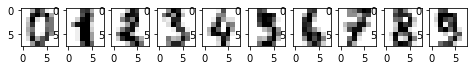

In [193]:
# plt.gray() 
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(8, 8))
for i,ax in zip(range(10),axes.flatten()):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
plt.show()


Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

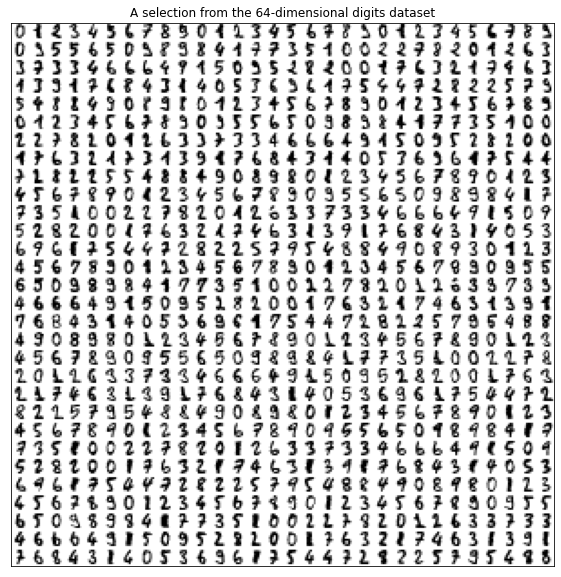

In [194]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

n_img_per_row = 30 # 每行显示30个图片

# 整个图形占 300*300，由于一张图片为8*8，所以每张图片周围包了一层白框，防止图片之间互相影响
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))

for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))  
plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


In [195]:
# 首先定义函数画出二维空间中的样本点，输入参数：1.降维后的数据；2.图片标题

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min) # 对每一个维度进行0-1归一化，注意此时X只有两个维度
    
    plt.figure(figsize= (6,6)) # 设置整个图形大小
    ax = plt.subplot(111)
    colors = ['#5dbe80','#2d9ed8','#a290c4','#efab40','#eb4e4f','#382d7a','#95c9b3','#612821','#b31b6c','#281540']
    
    # 画出样本点
    for i in range(X.shape[0]): # 每一行代表一个样本
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 #color=plt.cm.Set1(y[i] / 10.),
                 color=colors[y[i]],
                 fontdict={'weight': 'bold', 'size': 9})  # 在样本点所在位置画出样本点的数字标签        
    plt.xticks([]), plt.yticks([]) # 不显示横纵坐标刻度
    if title is not None: 
        plt.title(title) 


[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272696
 0.01821863 0.01773854 0.014671   0.01409713 0.01318573 0.01248111
 0.01017686 0.00905421]


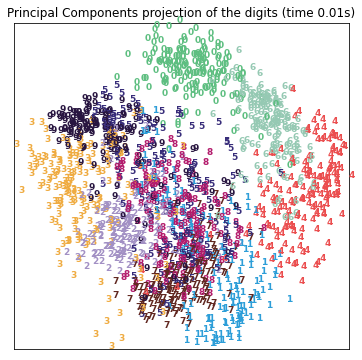

In [196]:
t0 = time()
pca = decomposition.PCA(n_components=20)
X_pca = pca.fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
print(pca.explained_variance_ratio_ )

In [197]:
print(X_pca)

[[ -1.25946713  21.27488252  -9.46305316 ...  -0.90660701   0.70102453
   -3.53022475]
 [  7.95761146 -20.76870021   4.43950695 ...   4.49502599  -1.97381672
   -5.25648646]
 [  6.99192367  -9.95598451   2.95855542 ...   1.27480493   0.18187419
    8.7596161 ]
 ...
 [ 10.80128365  -6.9602537    5.599557   ...   2.47626107   0.9943689
    2.45955378]
 [ -4.87209968  12.42395376 -10.17086666 ...  -0.60662615   6.56864154
   -0.0364831 ]
 [ -0.34438825   6.36554988  10.77370753 ...  -2.0837473    0.19484329
    5.43583687]]


In [198]:
pca_train_data, pca_test_data, pca_train_label, pca_test_label = train_test_split(
    X_pca, data.target, test_size=0.1, shuffle=False)

In [199]:
mlp = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4,hidden_layer_sizes=(100,100), random_state=1,max_iter=500,verbose=10,learning_rate_init=0.01)

In [200]:
print('准确率： %s' % cross_val_score(mlp, train_data, train_label).mean())

Iteration 1, loss = 3.33499222
Iteration 2, loss = 0.54618770
Iteration 3, loss = 0.25831077
Iteration 4, loss = 0.18285288
Iteration 5, loss = 0.11616709
Iteration 6, loss = 0.09778173
Iteration 7, loss = 0.07730899
Iteration 8, loss = 0.04880852
Iteration 9, loss = 0.04121136
Iteration 10, loss = 0.03295846
Iteration 11, loss = 0.02902402
Iteration 12, loss = 0.02477449
Iteration 13, loss = 0.02185468
Iteration 14, loss = 0.02127072
Iteration 15, loss = 0.01763691
Iteration 16, loss = 0.01706396
Iteration 17, loss = 0.01516744
Iteration 18, loss = 0.01304005
Iteration 19, loss = 0.01233511
Iteration 20, loss = 0.01169097
Iteration 21, loss = 0.01110520
Iteration 22, loss = 0.00940835
Iteration 23, loss = 0.00917365
Iteration 24, loss = 0.00866588
Iteration 25, loss = 0.00863718
Iteration 26, loss = 0.00761977
Iteration 27, loss = 0.00703548
Iteration 28, loss = 0.00662113
Iteration 29, loss = 0.00652874
Iteration 30, loss = 0.00637888
Iteration 31, loss = 0.00585674
Iteration 32, los

In [201]:
mlp_pca = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4,hidden_layer_sizes=(100,100), random_state=1,max_iter=500,verbose=10,learning_rate_init=0.01)

In [202]:
print('准确率： %s' % cross_val_score(mlp_pca, pca_train_data, pca_train_label).mean())

Iteration 1, loss = 2.11293872
Iteration 2, loss = 0.32436509
Iteration 3, loss = 0.16735795
Iteration 4, loss = 0.11403216
Iteration 5, loss = 0.08095900
Iteration 6, loss = 0.06051745
Iteration 7, loss = 0.04511592
Iteration 8, loss = 0.03607811
Iteration 9, loss = 0.02887634
Iteration 10, loss = 0.02419810
Iteration 11, loss = 0.02085026
Iteration 12, loss = 0.01838319
Iteration 13, loss = 0.01627225
Iteration 14, loss = 0.01463617
Iteration 15, loss = 0.01342386
Iteration 16, loss = 0.01230383
Iteration 17, loss = 0.01143212
Iteration 18, loss = 0.01059754
Iteration 19, loss = 0.00989931
Iteration 20, loss = 0.00928543
Iteration 21, loss = 0.00880862
Iteration 22, loss = 0.00830291
Iteration 23, loss = 0.00785594
Iteration 24, loss = 0.00746293
Iteration 25, loss = 0.00710425
Iteration 26, loss = 0.00677382
Iteration 27, loss = 0.00648677
Iteration 28, loss = 0.00618402
Iteration 29, loss = 0.00595645
Iteration 30, loss = 0.00571725
Iteration 31, loss = 0.00550288
Iteration 32, los